### Challenge 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading data

In [95]:
file_path = 'Mta_2019_df.pickle'

mta_df = pd.read_pickle(file_path)

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667


### Stripping spaces from column names

In [96]:
mta_df.columns = [column.strip() for column in mta_df.columns]

### Trying dividing up all stations by line (result is that station names are station-line)

Not doing this for now...

In [90]:
mta_df['STATION'] = mta_df['STATION'] + '  ' + mta_df['LINENAME']

mta_df['STATION'] = [name.strip() for name in mta_df['STATION']]

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Station_only
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,59 ST
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,59 ST
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,59 ST
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,59 ST
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,59 ST


### Dividing up 23rd street station

In [91]:
df_23_ST = mta_df[mta_df['STATION'] == '23 ST']

# adding line names to 23rd st station

df_23_ST['STATION'] = df_23_ST['STATION'] + '  ' + df_23_ST['LINENAME']

# All the other stations

filt_NOT_23ST = mta_df.loc[mta_df['STATION'] != '23 ST']
filt_NOT_23ST

# Putting the two back together

mta_df = pd.concat([filt_NOT_23ST, df_23_ST])
mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Station_only
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,59 ST
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,59 ST
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,59 ST
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,59 ST
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,59 ST


### Challenge 2

### Adding date_time column

In [97]:
# mta_df["DATETIME"] = pd.to_datetime(mta_df['DATE'] + ' ' + mta_df['TIME'])

mta_df["DATETIME"] = pd.to_datetime(mta_df["DATE"] + " " + mta_df["TIME"], format="%m/%d/%Y %H:%M:%S")

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00


### Challenge 3

### Adding turnstile column

In [98]:
# Adding turnstile column

mta_df['TURNSTILE'] = mta_df['C/A'] + ' ' + mta_df['UNIT'] + ' ' + mta_df['SCP'] + ' ' + mta_df['STATION']

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00,A002 R051 02-00-00 59 ST


In [99]:
# Checking that turnstile combos are really unique:

(mta_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
1093003,N306,R017,00-00-01,LEXINGTON AV/53,2019-05-23 04:00:00,2
912822,N120A,R153,01-05-01,UTICA AV,2019-05-19 13:00:00,2
1177826,N330,R202,00-00-02,63 DR-REGO PARK,2019-05-23 12:00:00,2
1177827,N330,R202,00-00-02,63 DR-REGO PARK,2019-05-23 16:00:00,2
1177828,N330,R202,00-00-02,63 DR-REGO PARK,2019-05-23 20:00:00,2
912813,N120A,R153,01-05-01,UTICA AV,2019-05-18 01:00:00,2
912814,N120A,R153,01-05-01,UTICA AV,2019-05-18 05:00:00,2
912815,N120A,R153,01-05-01,UTICA AV,2019-05-18 09:00:00,2
912816,N120A,R153,01-05-01,UTICA AV,2019-05-18 13:00:00,2
912817,N120A,R153,01-05-01,UTICA AV,2019-05-18 17:00:00,2


In [100]:
# Remove duplicates

mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)

mta_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

mta_df.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
207476,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,21:00:00,REGULAR,5554,379,2019-06-21 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207475,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,17:00:00,REGULAR,5554,379,2019-06-21 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,13:00:00,REGULAR,5554,379,2019-06-21 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,09:00:00,REGULAR,5554,379,2019-06-21 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,05:00:00,REGULAR,5554,379,2019-06-21 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207471,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,01:00:00,REGULAR,5554,379,2019-06-21 01:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207470,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/20/2019,21:00:00,REGULAR,5554,379,2019-06-20 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207469,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/20/2019,17:00:00,REGULAR,5554,379,2019-06-20 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/20/2019,13:00:00,REGULAR,5554,379,2019-06-20 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
207467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/20/2019,09:00:00,REGULAR,5554,379,2019-06-20 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT


In [101]:
turnstiles_daily = (mta_df
                        .groupby(["DATE", "TURNSTILE", ],as_index=False)
                        .ENTRIES.first())

# turnstiles_overall = (mta_df
#                         .groupby(["TURNSTILE", "DATE", "DATETIME"],as_index=False)
#                         .sum())

mta_daily = (mta_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)  #do not group by turnstile!! That will screw up box plot later
                        .ENTRIES.first())


### Adding previous date and entries columns

In [102]:
mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily
                                                .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                .apply(lambda grp: grp.shift(1)))

/Users/Julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [103]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,03/16/2019,6981415,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0


### Drop the rows for the earliest date in the df


In [104]:
mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0
5,A002,R051,02-00-00,59 ST,03/21/2019,6987992,03/20/2019,6986504.0


### Counters in reverse?

In [105]:
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
7653,A025,R023,01-03-01,34 ST-HERALD SQ,03/17/2019,1238616553,03/16/2019,1.238619e+09
7654,A025,R023,01-03-01,34 ST-HERALD SQ,03/18/2019,1238612634,03/17/2019,1.238617e+09
7655,A025,R023,01-03-01,34 ST-HERALD SQ,03/19/2019,1238608594,03/18/2019,1.238613e+09
7656,A025,R023,01-03-01,34 ST-HERALD SQ,03/20/2019,1238604518,03/19/2019,1.238609e+09
7657,A025,R023,01-03-01,34 ST-HERALD SQ,03/21/2019,1238600427,03/20/2019,1.238605e+09


### Let's see how many stations have this problem


In [106]:
(mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    97
A037  R170  05-00-00  14 ST-UNION SQ      1
A038  R085  00-00-01  8 ST-NYU            1
A039  R085  01-00-01  8 ST-NYU            1
A042  R086  01-00-04  PRINCE ST           1
                                         ..
R623  R061  00-00-01  NOSTRAND AV         2
R629  R065  00-00-00  ROCKAWAY AV         1
R645  R110  00-03-00  FLATBUSH AV-B.C     1
R646  R110  01-00-01  FLATBUSH AV-B.C    97
R730  R431  00-00-04  EASTCHSTER/DYRE    93
Length: 575, dtype: int64

### Fixing counter

In [107]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=40000)

617 3124306.0
1376864 4960567.0
460397 294513.0
644 2234841.0
182 111625.0
458941 950058.0
1034 127369.0
512 67586631.0
3418 221540.0
62 185793.0
1376283 8703.0
142 1087600.0
419 1094836.0
331 40780.0
371 4317056.0
1790 13967417.0
1442 292940.0
458914 820296.0
787212 589200.0
761 1164049.0
397 43478.0
221 7246254.0
4050694 5902992.0
7246468 4050451.0
41 1972969.0
86 1130846.0
218 2131081.0
162 1333613.0
8 913957.0
769 15418705.0
33611930 186793.0
417 127761.0
196849 1969774.0
458903 1265085.0
23 117492.0
38 90148.0
205 50255.0
237 474424.0
323 204182.0
437 83634.0
84770 10238.0
2342 102694.0
663 175865.0
1129 68842.0
862 137053.0
171 83359.0
1377 4767345.0
458757 5067.0
458758 13397.0
335092173 3421982.0
134 3072837.0
39 4605263.0
5571815 104607574.0
559 2225874.0
1132 201981.0
954 6879812.0
1473 5925049.0
5927279 1473.0
2267657 3211131.0
3212888 2267657.0
8480234 3070412.0
3072147 8480234.0
1856335 5153313.0
5155435 1856335.0
10668361 762437.0
765949 10668361.0
458907 601697.0
602119 

In [108]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0,623.0
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0,1382.0
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0,1501.0
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0,1583.0
5,A002,R051,02-00-00,59 ST,03/21/2019,6987992,03/20/2019,6986504.0,1488.0


### Examine distribution

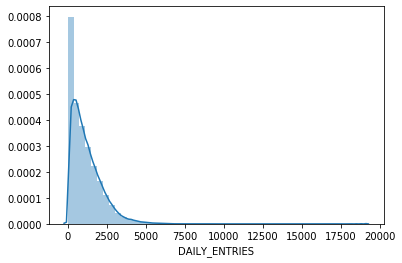

In [109]:
sns.distplot(mta_daily['DAILY_ENTRIES']
             [mta_daily['DAILY_ENTRIES'] < 20000])

### First get daily entries by station

In [110]:
stations_daily = \
(mta_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,03/17/2019,2.0
1,1 AV,03/18/2019,16141.0
2,1 AV,03/19/2019,19515.0
3,1 AV,03/20/2019,19885.0
4,1 AV,03/21/2019,20484.0


### Filter outliers (200k)

In [111]:
# outlier_mask = (mta_daily['DAILY_ENTRIES']<=10000)
# stations_daily = mta_daily[outlier_mask]

# stations_daily.head()

### Then get top 10 stations by daily volume 

In [112]:
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
233    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
46               23 ST
68     42 ST-PORT AUTH
14      14 ST-UNION SQ
353     TIMES SQ-42 ST
226          FULTON ST
110              86 ST
9               125 ST
Name: STATION, dtype: object

### Next create a new df that filters the stations daily data down to the top 10

In [113]:
station_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)].sort_values(by = 'DAILY_ENTRIES', ascending = False)

In [114]:
station_daily_top10.head()

,STATION,DATE,DAILY_ENTRIES
4511,23 ST,05/11/2019,204163.0
5999,34 ST-PENN STA,06/13/2019,184813.0
5978,34 ST-PENN STA,05/23/2019,184058.0
6004,34 ST-PENN STA,06/18/2019,183425.0
6006,34 ST-PENN STA,06/20/2019,182547.0


### Plot top 10

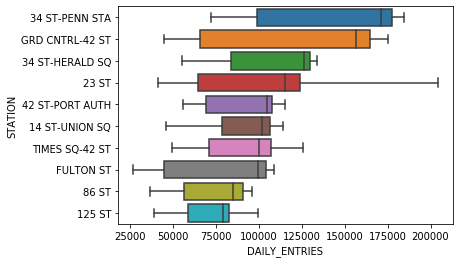

In [115]:
sns.boxplot(x='DAILY_ENTRIES', y='STATION', data=station_daily_top10, order = top10_stations, showfliers = False);

### Note: Changing stations to stations + line (see above) changes this fig a bit. Is this what we want?

### Challenge 4

In [116]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0,623.0
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0,1382.0
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0,1501.0
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0,1583.0
5,A002,R051,02-00-00,59 ST,03/21/2019,6987992,03/20/2019,6986504.0,1488.0


In [117]:
# by turnstile with daily entries

# mta_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DAILY_ENTRIES'].sum().reset_index()

mta_daily['TURNSTILE'] = mta_daily['C/A'] + ' ' + mta_daily['UNIT'] + ' ' + mta_daily['SCP'] + ' ' + mta_daily['STATION']

mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0,623.0,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0,1382.0,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0,1501.0,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0,1583.0,A002 R051 02-00-00 59 ST
5,A002,R051,02-00-00,59 ST,03/21/2019,6987992,03/20/2019,6986504.0,1488.0,A002 R051 02-00-00 59 ST


In [118]:
mta_daily['TURNSTILE'].value_counts()

N013 R035 02-00-03 168 ST             97
K025 R404 00-03-00 FRESH POND RD      97
R259 R307 00-00-02 138/GRAND CONC     97
K026 R100 00-00-04 METROPOLITAN AV    97
R417 R222 00-05-01 PARKCHESTER        97
                                      ..
N071 R013 00-06-01 34 ST-PENN STA      1
N071 R013 00-03-05 34 ST-PENN STA      1
N071 R013 00-03-03 34 ST-PENN STA      1
PTH19 R549 02-02-08 NEWARK C           1
N071 R013 00-03-00 34 ST-PENN STA      1
Name: TURNSTILE, Length: 4907, dtype: int64

In [119]:
# Getting a single turnstile

mask = mta_daily['TURNSTILE'] == 'A002 R051 02-00-00 59 ST' # does not work with station names being station+line

# mask = mta_daily['TURNSTILE']=='R116 R030 00-06-00 CHAMBERS ST  123'  # use this if organizing by station+line

one_turn = mta_daily[mask]

one_turn.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0,623.0,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0,1382.0,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0,1501.0,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0,1583.0,A002 R051 02-00-00 59 ST
5,A002,R051,02-00-00,59 ST,03/21/2019,6987992,03/20/2019,6986504.0,1488.0,A002 R051 02-00-00 59 ST


In [120]:
# Making new grouped frame by day

one_turn_daily = one_turn.groupby(['TURNSTILE', 'DATE'])['DAILY_ENTRIES'].sum().reset_index()

# one_turn_daily = one_turn.groupby(['TURNSTILE', 'DATE'])['DAILY_ENTRIES'].sum().reset_index()


one_turn_daily.head()

,TURNSTILE,DATE,DAILY_ENTRIES
0,A002 R051 02-00-00 59 ST,03/17/2019,623.0
1,A002 R051 02-00-00 59 ST,03/18/2019,1382.0
2,A002 R051 02-00-00 59 ST,03/19/2019,1501.0
3,A002 R051 02-00-00 59 ST,03/20/2019,1583.0
4,A002 R051 02-00-00 59 ST,03/21/2019,1488.0


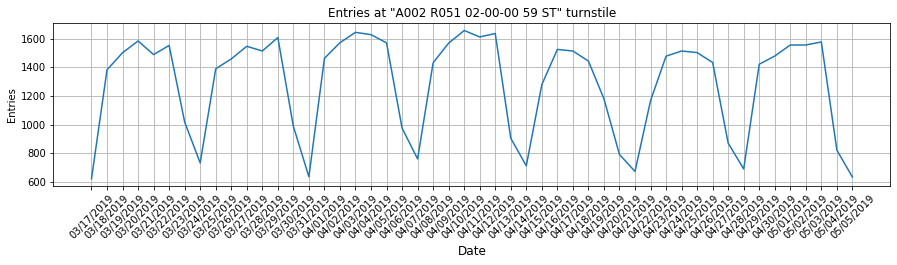

In [121]:
# Plotting one turnstile by day for 50 days

x = one_turn_daily['DATE'][:50]
y = one_turn_daily['DAILY_ENTRIES'][:50]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.grid()
plt.xlabel('Date', size = 12)
plt.ylabel('Entries')
plt.xticks(rotation=45)
plt.title('Entries at {} turnstile'.format('"A002 R051 02-00-00 59 ST"'));


### Challenge 5

In [122]:
# Grouping by station


# turnstiles_daily.head()

# CA_U_S = turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum()

CA_U_S = mta_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE'], as_index = False).sum()

CA_U_S.head()

,C/A,UNIT,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,59 ST,03/17/2019,54633815,54627558.0,6257.0
1,A002,R051,59 ST,03/18/2019,54645862,54633815.0,12047.0
2,A002,R051,59 ST,03/19/2019,54658997,54645862.0,13135.0
3,A002,R051,59 ST,03/20/2019,54672404,54658997.0,13407.0
4,A002,R051,59 ST,03/21/2019,54685633,54672404.0,13229.0


### Challenge 6

In [123]:
# Grouping by station

# stations_daily = turnstiles_daily.groupby(['STATION', 'DATE']).sum()

stations_grouped_df = mta_daily.groupby(['STATION', 'DATE'], as_index = False).sum()

stations_grouped_df.head()

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV,03/17/2019,1412586441,1.412586e+09,2.0
1,1 AV,03/18/2019,1412602582,1.412586e+09,16141.0
2,1 AV,03/19/2019,1412622097,1.412603e+09,19515.0
3,1 AV,03/20/2019,1412641982,1.412622e+09,19885.0
4,1 AV,03/21/2019,1412662466,1.412642e+09,20484.0


In [124]:
stations_grouped_df['STATION'].value_counts()

METROPOLITAN AV    97
MORRIS PARK        97
CASTLE HILL AV     97
36 AV              97
WESTCHESTER SQ     97
                   ..
BOWERY             94
EASTCHSTER/DYRE    93
5 AVE              92
ORCHARD BEACH      31
ASTORIA BLVD        2
Name: STATION, Length: 379, dtype: int64

### Challenge 7

In [125]:
# Extracting a single station

# mask = stations_grouped_df['STATION'] == '86 ST  R'  # Use this if station = station+line above

mask = stations_grouped_df['STATION'] == '1 AV'

one_station = stations_grouped_df[mask]

one_station.head()

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV,03/17/2019,1412586441,1.412586e+09,2.0
1,1 AV,03/18/2019,1412602582,1.412586e+09,16141.0
2,1 AV,03/19/2019,1412622097,1.412603e+09,19515.0
3,1 AV,03/20/2019,1412641982,1.412622e+09,19885.0
4,1 AV,03/21/2019,1412662466,1.412642e+09,20484.0


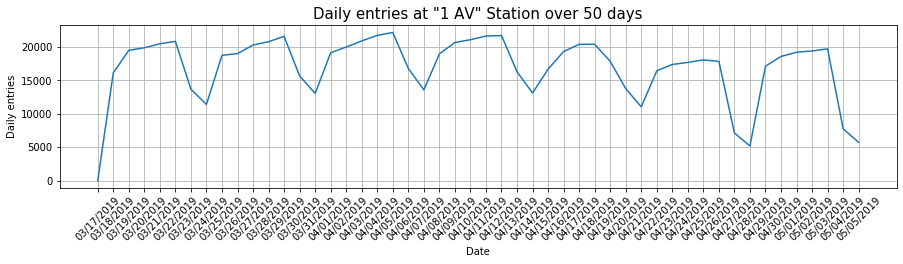

In [126]:
# Plotting daily entries for one station

x = one_station['DATE'][:50]
y = one_station['DAILY_ENTRIES'][:50]

plt.figure(figsize=(15,3))
plt.grid()
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Daily entries')
# plt.title('Daily entries at "86 ST  R" Station over 50 days', size=15) # Use this if station = station+line above
plt.title('Daily entries at "1 AV" Station over 50 days', size=15)

plt.xticks(rotation=45);

### Challenge 8

In [127]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0,623.0,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0,1382.0,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0,1501.0,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0,1583.0,A002 R051 02-00-00 59 ST
5,A002,R051,02-00-00,59 ST,03/21/2019,6987992,03/20/2019,6986504.0,1488.0,A002 R051 02-00-00 59 ST


In [128]:
# Adding weekday column to mta_daily

mta_daily['WEEK_DAY'] = pd.to_datetime(mta_daily['DATE']).dt.dayofweek

mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK_DAY
1,A002,R051,02-00-00,59 ST,03/17/2019,6982038,03/16/2019,6981415.0,623.0,A002 R051 02-00-00 59 ST,6
2,A002,R051,02-00-00,59 ST,03/18/2019,6983420,03/17/2019,6982038.0,1382.0,A002 R051 02-00-00 59 ST,0
3,A002,R051,02-00-00,59 ST,03/19/2019,6984921,03/18/2019,6983420.0,1501.0,A002 R051 02-00-00 59 ST,1
4,A002,R051,02-00-00,59 ST,03/20/2019,6986504,03/19/2019,6984921.0,1583.0,A002 R051 02-00-00 59 ST,2
5,A002,R051,02-00-00,59 ST,03/21/2019,6987992,03/20/2019,6986504.0,1488.0,A002 R051 02-00-00 59 ST,3


Desired: a list of frames; each having daily entries for 1 week

"Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week."

In [129]:
# Making a function to get entries by week

def get_week_list(input_frame, column_name, num_days):
    """
    Loops through dataframe and divides up desired column by increments of number of days (ex: 7 for a week)
    """
    window = 1   # starts at 1 because first day 0 is in second row
    week_list = []
    while window < len(input_frame)-num_days:  
        week_list.append(input_frame[column_name][window:window+num_days])  # do NOT double bracket daily entries. Will kill kernel
        window+=num_days
    return week_list

In [130]:
# Testing it

# input_frame = mta_daily[mta_daily['STATION'] == '86 ST  R'] # Use this if station = station+line above
input_frame = mta_daily[mta_daily['STATION'] == '1 AV']
column_name = 'DAILY_ENTRIES'
num_days = 7

get_week_list(input_frame, column_name, num_days)

[71644    1904.0
 71645    3242.0
 71646    3819.0
 71647    4152.0
 71648    4083.0
 71649    2363.0
 71650    1684.0
 Name: DAILY_ENTRIES, dtype: float64,
 71651    3496.0
 71652    3741.0
 71653    4000.0
 71654    4677.0
 71655    4152.0
 71656    2307.0
 71657    2019.0
 Name: DAILY_ENTRIES, dtype: float64,
 71658    3724.0
 71659    4141.0
 71660    3972.0
 71661    4315.0
 71662    4355.0
 71663    2446.0
 71664    2008.0
 Name: DAILY_ENTRIES, dtype: float64,
 71665    3546.0
 71666    4055.0
 71667    4238.0
 71668    4373.0
 71669    4345.0
 71670    2355.0
 71671    2056.0
 Name: DAILY_ENTRIES, dtype: float64,
 71672    3369.0
 71673    3896.0
 71674    4219.0
 71675    4042.0
 71676    3336.0
 71677    2210.0
 71678    1750.0
 Name: DAILY_ENTRIES, dtype: float64,
 71679    3149.0
 71680    3654.0
 71681    3407.0
 71682    3644.0
 71683    3447.0
 71684     186.0
 71685       0.0
 Name: DAILY_ENTRIES, dtype: float64,
 71686    3227.0
 71687    3738.0
 71688    3618.0
 71689 

In [131]:
# viewing single entry

get_week_list(input_frame, column_name, num_days)[0]

71644    1904.0
71645    3242.0
71646    3819.0
71647    4152.0
71648    4083.0
71649    2363.0
71650    1684.0
Name: DAILY_ENTRIES, dtype: float64

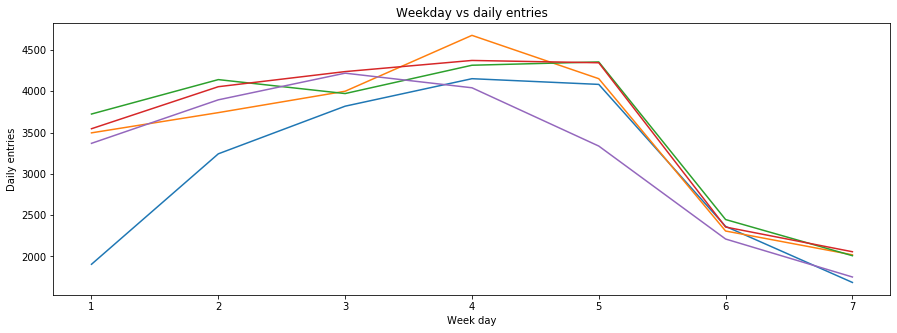

In [132]:
# Plotting

x = np.arange(1,8) # weekdays from 1 to 7
weeks = get_week_list(input_frame, column_name, num_days)

plt.figure(figsize = (15, 5))
plt.xlabel('Week day')
plt.ylabel('Daily entries')
plt.title('Weekday vs daily entries')
for i in weeks[:5]:   # plotting 5 weeks for a single station
    legend_text = []
    plt.plot(x, i);
# plt.legend()

### Challenge 9

### Including Demographic Information into Our Analysis

In [133]:
# Reads in a csv of stations in high income neighborhoods and saves as a df
bougie_df = pd.read_csv('Income_Stations_by_Neighborhood.csv')
bougie_df.head()

,NEIGHBORHOOD,MAP NAME,MTA DATA SET IDENTIFIER
0,Upper East Side,86 ST (456),86 ST-2 AVE
1,Upper East Side,96 St(456),96 ST-2 AVE
2,Upper East Side,96 St(Q),96 ST
3,Upper East Side,77 St,77 ST
4,Upper East Side,72 St,72 ST


In [135]:
"""
Takes the df of stations in high income neighborhoods and gets the top 10 busiest
stations of those stations
"""
bougie_list = bougie_df['MTA DATA SET IDENTIFIER']
bougie_stations = \
    stations_daily[stations_daily['STATION'].isin(bougie_list)].sort_values(by = 'DAILY_ENTRIES', ascending = False)
bougie_top10 = \
    (bougie_stations.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))
bougie_top10.head()

,STATION,DATE,DAILY_ENTRIES
4511,23 ST,05/11/2019,204163.0
22571,GRD CNTRL-42 ST,06/18/2019,175072.0
4514,23 ST,05/14/2019,174412.0
22551,GRD CNTRL-42 ST,05/29/2019,174191.0
22482,GRD CNTRL-42 ST,03/21/2019,173299.0


In [140]:
bougie_stations.head()

,STATION,DATE,DAILY_ENTRIES
4511,23 ST,05/11/2019,204163.0
22571,GRD CNTRL-42 ST,06/18/2019,175072.0
4514,23 ST,05/14/2019,174412.0
22551,GRD CNTRL-42 ST,05/29/2019,174191.0
22482,GRD CNTRL-42 ST,03/21/2019,173299.0


In [143]:
sns.boxplot(x='DAILY_ENTRIES', y='STATION', data=bougie_top10, showfliers = False);

ValueError: Could not interpret input 'DAILY_ENTRIES'